# RS

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
data=pd.read_csv('SonarData.csv',names=range(0,61),header=0)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


Exploratory Data Analysis

In [5]:
data.shape

(207, 61)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0     207 non-null float64
1     207 non-null float64
2     207 non-null float64
3     207 non-null float64
4     207 non-null float64
5     207 non-null float64
6     207 non-null float64
7     207 non-null float64
8     207 non-null float64
9     207 non-null float64
10    207 non-null float64
11    207 non-null float64
12    207 non-null float64
13    207 non-null float64
14    207 non-null float64
15    207 non-null float64
16    207 non-null float64
17    207 non-null float64
18    207 non-null float64
19    207 non-null float64
20    207 non-null float64
21    207 non-null float64
22    207 non-null float64
23    207 non-null float64
24    207 non-null float64
25    207 non-null float64
26    207 non-null float64
27    207 non-null float64
28    207 non-null float64
29    207 non-null float64
30    207 non-null float64
31    207 non-null float64
32    207 non-null float64
33  

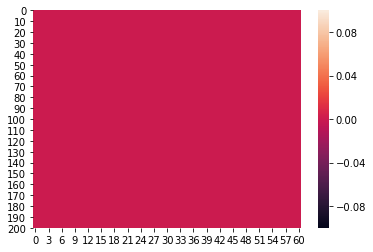

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [19]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523,0.463768
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038,0.499894
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100,0.000000
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300,0.000000
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lr=LabelEncoder()
data[60]=lr.fit_transform(data[60])
data[60]

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 207, dtype: int64

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


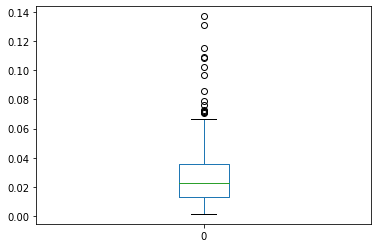

In [18]:
data[0].plot.box()

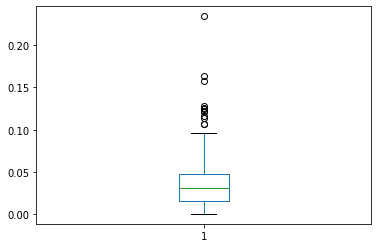

In [22]:
data[1].plot.box()

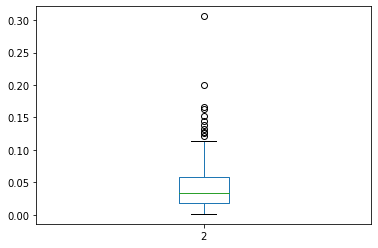

In [23]:
data[2].plot.box()

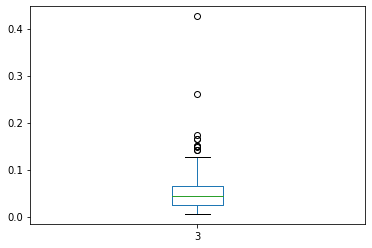

In [24]:
data[3].plot.box()

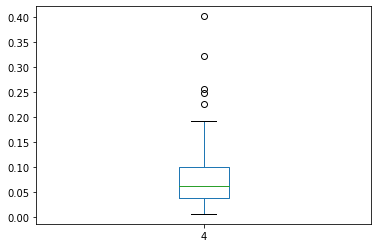

In [25]:
data[4].plot.box()

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.70018948, 0.42042142, 1.0529498 , ..., 0.44268846, 0.42246083,
        1.07529066],
       [0.13089402, 0.59942737, 1.71912994, ..., 0.25299833, 0.25405324,
        1.07529066],
       [0.83579208, 0.64754631, 0.48045125, ..., 0.63683361, 1.03005467,
        1.07529066],
       ...,
       [1.00042384, 0.15949749, 0.67235266, ..., 0.0382194 , 0.68112798,
        0.92998111],
       [0.0475061 , 0.09535845, 0.13434985, ..., 0.70154866, 0.34287094,
        0.92998111],
       [0.13959647, 0.06501846, 0.78685237, ..., 0.2970796 , 0.99025973,
        0.92998111]])

In [27]:
np.where(z>3)

(array([  1,   1,   1,   1,   2,   2,   4,   4,  18,  18,  19,  20,  21,
         21,  21,  21,  21,  21,  21,  21,  32,  43,  43,  43,  64,  84,
         84,  86,  90,  90,  96,  96,  97,  97,  97,  97,  97,  97, 100,
        100, 104, 110, 110, 110, 111, 126, 126, 126, 128, 128, 128, 130,
        131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134,
        135, 135, 135, 135, 136, 136, 137, 137, 137, 139, 139, 139, 139,
        139, 140, 140, 141, 141, 141, 142, 142, 142, 143, 144, 144, 145,
        145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146,
        146, 146, 146, 160, 183, 185, 185, 185], dtype=int64),
 array([ 8,  9, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41, 46,
        47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,  1,
         2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12, 53,
         0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,  8,
        51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 5

In [28]:
data_new=data[(z<3).all(axis=1)]
data_new

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


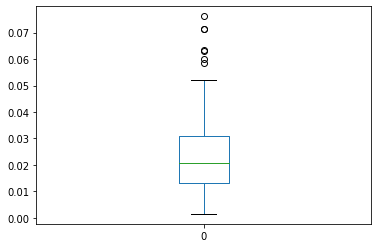

In [30]:
data_new[0].plot.box()

In [31]:
data.skew()

0     2.122983
1     2.149965
2     2.645849
3     3.397590
4     2.020369
        ...   
56    1.685823
57    2.094443
58    1.736231
59    2.769687
60    0.146372
Length: 61, dtype: float64

In [32]:
data_new.skew()

0     1.252721
1     1.308041
2     1.653128
3     1.229816
4     0.933829
        ...   
56    1.404770
57    1.371583
58    1.472084
59    1.135577
60    0.012085
Length: 61, dtype: float64

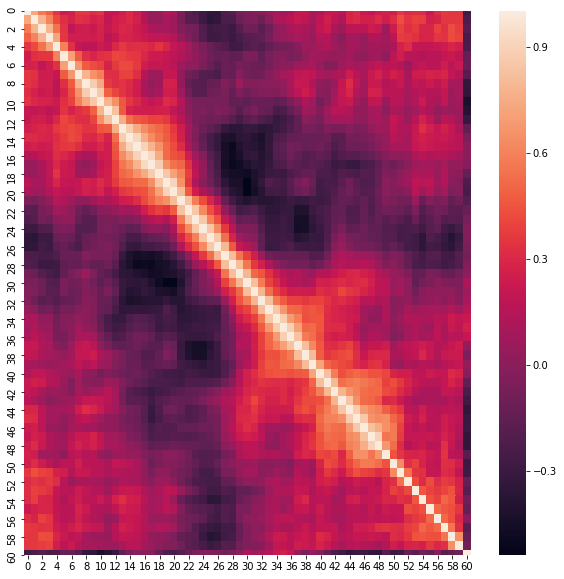

In [35]:
cor=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor)

In [36]:
cor

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302,-0.270482
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010,-0.231670
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256,-0.192589
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262,-0.247935
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220,-0.224809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.319663,0.282822,0.383945,0.349411,0.218004,0.163433,0.183382,0.266743,0.186347,0.141211,...,0.202905,0.315943,0.358746,0.392768,0.509056,1.000000,0.513086,0.433130,0.295369,-0.010152
57,0.368413,0.353061,0.334122,0.345537,0.238749,0.204027,0.242632,0.287568,0.232078,0.212272,...,0.310989,0.371290,0.404345,0.503677,0.465640,0.513086,1.000000,0.550223,0.330400,-0.185066
58,0.357611,0.352260,0.425100,0.421410,0.290793,0.220678,0.183279,0.194209,0.096662,0.058260,...,0.300562,0.346915,0.447086,0.454032,0.431902,0.433130,0.550223,1.000000,0.644140,-0.132088
59,0.346302,0.359010,0.374256,0.399262,0.255220,0.178027,0.224536,0.147350,0.099233,0.097528,...,0.192609,0.279412,0.286259,0.263791,0.356433,0.295369,0.330400,0.644140,1.000000,-0.086982


In [37]:
data_new.corr()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.607726,0.495046,0.297068,0.240402,0.223621,0.192202,0.268678,0.230688,0.281563,...,0.031215,0.101365,0.054306,0.183595,0.256583,0.267838,0.219018,0.272708,0.279437,-0.193792
1,0.607726,1.000000,0.705319,0.425212,0.285885,0.272123,0.173574,0.214865,0.221120,0.267240,...,0.182276,0.248327,0.238442,0.333958,0.313979,0.289902,0.273239,0.286095,0.327445,-0.166789
2,0.495046,0.705319,1.000000,0.591934,0.363063,0.254846,0.133049,0.284024,0.274714,0.293548,...,0.235795,0.255497,0.201870,0.231122,0.351721,0.391939,0.240864,0.299066,0.322239,-0.128705
3,0.297068,0.425212,0.591934,1.000000,0.581850,0.302753,0.227237,0.309301,0.164799,0.188778,...,0.248531,0.258288,0.164034,0.113364,0.340695,0.276367,0.281171,0.370891,0.276731,-0.196689
4,0.240402,0.285885,0.363063,0.581850,1.000000,0.607442,0.300607,0.236474,0.209499,0.252251,...,0.267940,0.294085,0.129024,0.098190,0.128308,0.053986,0.146179,0.208864,0.134570,-0.234753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.267838,0.289902,0.391939,0.276367,0.053986,0.106894,0.087868,0.194257,-0.027193,-0.035230,...,0.013345,0.213119,0.279635,0.272483,0.471025,1.000000,0.435869,0.365305,0.332057,0.117974
57,0.219018,0.273239,0.240864,0.281171,0.146179,0.145645,0.088440,0.166702,0.081249,0.075310,...,0.120147,0.129173,0.313948,0.298568,0.279251,0.435869,1.000000,0.435708,0.299469,-0.081900
58,0.272708,0.286095,0.299066,0.370891,0.208864,0.163679,0.179400,0.176026,0.008188,0.066506,...,0.161003,0.262051,0.278954,0.299720,0.306379,0.365305,0.435708,1.000000,0.609806,-0.020426
59,0.279437,0.327445,0.322239,0.276731,0.134570,0.167815,0.177543,0.176828,0.019707,0.097577,...,0.054646,0.245145,0.279979,0.172100,0.355326,0.332057,0.299469,0.609806,1.000000,0.009572


In [38]:
print(data.shape)
print(data_new.shape)

(207, 61)
(167, 61)


Machine Learning

In [41]:
x=data_new.iloc[:,0:-1].values
x

array([[0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0762, 0.0666, 0.0481, ..., 0.0048, 0.0107, 0.0094],
       [0.0317, 0.0956, 0.1321, ..., 0.0143, 0.0036, 0.0103],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [42]:
y=data_new.iloc[:,-1].values.reshape(-1,1)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [46]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=45,test_size=.22)

In [47]:
train_x.shape

(130, 60)

In [48]:
test_x.shape

(37, 60)

In [49]:
train_y.shape

(130, 1)

In [50]:
test_y.shape

(37, 1)

In [52]:
Lr=LogisticRegression()
Lr.fit(train_x,train_y)
pred=Lr.predict(test_x)
pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [53]:
print('Accuracy Score',accuracy_score(pred,test_y))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(pred,test_y))
print('\n')
print('Classification Report')
print(classification_report(pred,test_y))

Accuracy Score 0.8378378378378378


Confusion Matrix
[[22  5]
 [ 1  9]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.64      0.90      0.75        10

    accuracy                           0.84        37
   macro avg       0.80      0.86      0.82        37
weighted avg       0.87      0.84      0.84        37



In [55]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)
gnbpred=gnb.predict(test_x)
print('Predicted',gnbpred)
print('Real',test_y)

Predicted [1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0]
Real [[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [56]:
print('Accuracy Score',accuracy_score(gnbpred,test_y))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(gnbpred,test_y))
print('\n')
print('Classification Report')
print(classification_report(gnbpred,test_y))

Accuracy Score 0.7027027027027027


Confusion Matrix
[[18  6]
 [ 5  8]]


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.57      0.62      0.59        13

    accuracy                           0.70        37
   macro avg       0.68      0.68      0.68        37
weighted avg       0.71      0.70      0.71        37



In [60]:
from sklearn.externals import joblib
joblib.dump(Lr,'Sonar.obj')

['Sonar.obj']